# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
os.getcwd()

'C:\\Users\\Abhinov Baruah\\Documents\\BIGMOUNTAIN_DOCUMENT_STEP6'

In [3]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '1588204790_GuidedCapstoneStep6HL.ipynb.zip',
 'Notebook_stepsix.ipynb',
 '__MACOSX']

In [4]:
os.chdir(r'C:\Users\Abhinov Baruah\Documents\DataWrangling_Step2\Step 2\data')

In [5]:
os.getcwd()

'C:\\Users\\Abhinov Baruah\\Documents\\DataWrangling_Step2\\Step 2\\data'

In [6]:
os.listdir(os.getcwd())

['Model_Coefficients.csv',
 'step2_output.csv',
 'Step3_EDA.csv',
 'Step3_output.csv',
 'SWEETVIZ_REPORT.html']

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [7]:
df = pd.read_csv('Step3_output.csv')
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [8]:
# Encoding the categorical variable 'state' to dummies:

df = pd.concat([df.drop('state',axis=1),pd.get_dummies(df['state'],drop_first=True)],axis=1)


In [9]:
df.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,1,0.0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(330, 59)

In [11]:
# Standardize the magnitude of numerical features:

# first we import the preprocessing package from the sklearn library:
from sklearn.preprocessing import StandardScaler

# Create the Variable X which is going to consist of the all the independent features apart from the target/response variable
# AdultWeekend,Name:
X = df.drop(['Name','AdultWeekend'],axis=1)

# Create the response variable y which contains the target feature AdultWeekend which we are going to study:
y = df['AdultWeekend']

# Initilize a scaler object:
scaler = StandardScaler()
#StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler.fit(X)
#declare a variable X_scaled, and assign it the result of calling the transform() method with parameter X
X_scaled = scaler.transform(X)


In [12]:
# Splitting the data into TEST and TRAIN:
# Import train_test_split from sklearn.model_selection:
from sklearn.model_selection import train_test_split

#Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Now lets split the data into train and test dataset by calling the train_test_split():

train_X,test_X,train_y,test_y = train_test_split(X_scaled,y,test_size=0.25,random_state=1)

In [13]:
# Create a linear Model to predict the response variable:

from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

linear = linear_model.LinearRegression()
model1 = linear.fit(train_X,train_y)
y_predict = model1.predict(test_X)

In [14]:
model1_exp_var_score = explained_variance_score(test_y,y_predict)
print('The mean variance score for Model1 is : ' + str(model1_exp_var_score))

The mean variance score for Model1 is : 0.9432371028481277


In [15]:
model1_mean_abs_er = mean_absolute_error(test_y,y_predict)
print('The mean absolute error for Model1 is : ' + str(model1_mean_abs_er))

The mean absolute error for Model1 is : 4.7836518256297325


In [16]:
model1.intercept_

64.09163168146657

In [17]:
print('Y predict is :' + str(y_predict)

SyntaxError: unexpected EOF while parsing (<ipython-input-17-06e69e483a27>, line 1)

In [18]:
train_X.shape

(247, 57)

In [19]:
train_y.shape

(247,)

In [20]:
model1.coef_

array([ 1.71094282e+00,  1.19804441e+00, -3.40183974e+11, -3.34434171e+10,
       -3.95918274e+11, -1.33552902e+12, -7.97227736e+11, -9.83669527e+11,
       -1.10268361e+12, -1.25129054e+12,  3.52287280e+12, -1.18900929e+00,
       -2.59221121e-02, -3.83582649e-01, -5.08541252e-01,  3.16516321e-01,
        5.93686969e-01,  3.71463574e-01, -1.35694077e-01,  1.92986276e+01,
       -1.59316027e-01,  8.10959333e-01,  9.90007870e-01, -1.11855494e-01,
       -5.52490571e-01, -4.11365066e-02,  8.59977106e-01, -6.88915550e-01,
        4.01382744e-01, -2.01662443e-01, -1.07879403e-01,  7.07201951e-01,
        7.07411931e-01,  1.95678711e+00,  6.42967224e-01, -5.18798828e-02,
       -3.44238281e-02, -1.08203125e+00,  2.45239258e-01,  1.87127686e+00,
        2.94433594e-01, -5.84960938e-01,  7.94464111e-01,  2.07516479e+00,
       -4.22485352e-01, -3.87145996e-01,  1.32238770e+00,  3.56094360e-01,
       -2.22778320e-01,  1.21264648e+00,  6.24755859e-01,  7.89550781e-01,
        1.06890869e+00, -

In [21]:
pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient']).sort_values('Coefficient',ascending=False)

,Coefficient
total_chairs,3.522873e+12
AdultWeekday,1.929863e+01
North Carolina,2.075165e+00
Massachusetts,1.956787e+00
New Hampshire,1.871277e+00
summit_elev,1.710943e+00
West Virginia,1.396057e+00
Pennsylvania,1.322388e+00
Tennessee,1.212646e+00
vertical_drop,1.198044e+00


In [22]:
pd.DataFrame(abs(model1.coef_),X.columns,columns=['Coefficient']).sort_values('Coefficient',ascending=False).head(10)

,Coefficient
total_chairs,3.522873e+12
fastQuads,1.335529e+12
surface,1.251291e+12
double,1.102684e+12
triple,9.836695e+11
quad,7.972277e+11
fastSixes,3.959183e+11
trams,3.401840e+11
fastEight,3.344342e+10
AdultWeekday,1.929863e+01


In [27]:
ActVsPred = pd.DataFrame({'Actual': test_y, 'Predicted': y_predict})
ActVsPred.head(25)

,Actual,Predicted
0,64.16681,57.807807
1,88.00000,89.037818
2,74.00000,78.846625
3,78.00000,75.879462
4,64.16681,69.222114
5,79.00000,77.197700
6,60.00000,44.657905
7,69.00000,46.865790
8,81.00000,94.046958
9,88.00000,84.768744


In [83]:
ActVsPred.shape

(83, 2)

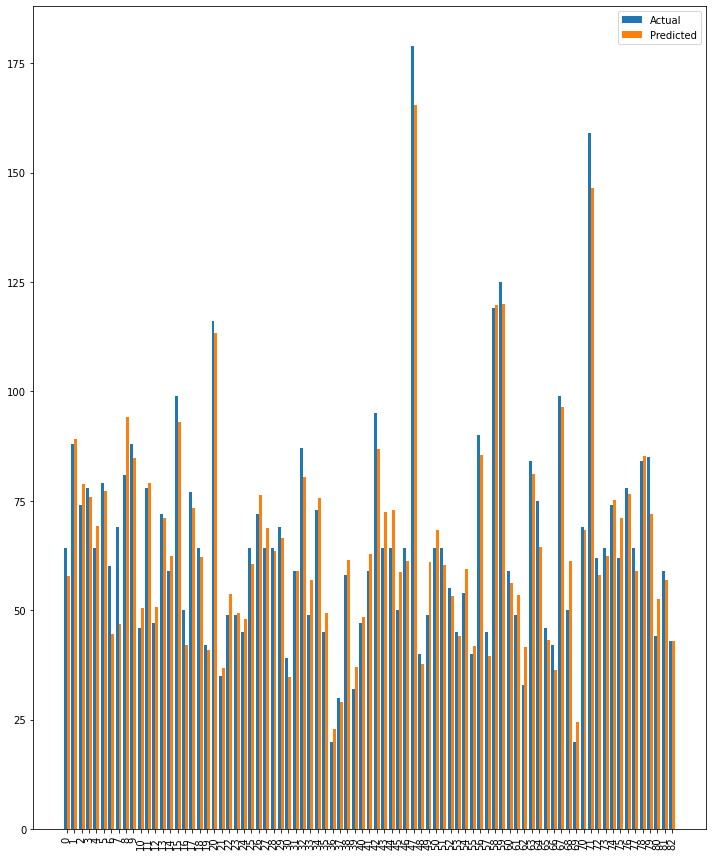

In [55]:
fig,ax =plt.subplots(figsize=(10,12))
bar_width = 0.4
ax.bar(ActVsPred.index,ActVsPred['Actual'],width=bar_width,label='Actual')
ax.bar(ActVsPred.index+bar_width,ActVsPred['Predicted'],label='Predicted',width=bar_width)
ax.set_xticklabels(ActVsPred.index,rotation=90)
ax.set_xticks(ActVsPred.index + bar_width/2)
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
fig.tight_layout()
plt.show()

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [56]:
df[df['Name'].str.contains('Big Mountain')]

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
151,Big Mountain Resort,6817,2353,0,0.0,0,3,2,6,0,...,0,0,0,0,0,0,0,0,0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [57]:
Bigmount = df[df['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend'],axis=1)

from sklearn.preprocessing import StandardScaler
scaler_obj = StandardScaler()
scaler_obj.fit(X)
X_scaled_bigmount = scaler_obj.transform(Bigmount) 

In [58]:
#Predicting the AdultWeekend price for BigMount Resort:

Price_Predict_BigMount = model1.predict(X_scaled_bigmount)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [59]:
# AdultWeekend Price for Big Mountain Resort:

Price_Predict_BigMount

array([84.56563295])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [60]:
df['AdultWeekend'][df['Name'].str.contains("Big Mountain Resort")]

151    81.0
Name: AdultWeekend, dtype: float64

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   summit_elev        330 non-null    int64  
 2   vertical_drop      330 non-null    int64  
 3   trams              330 non-null    int64  
 4   fastEight          330 non-null    float64
 5   fastSixes          330 non-null    int64  
 6   fastQuads          330 non-null    int64  
 7   quad               330 non-null    int64  
 8   triple             330 non-null    int64  
 9   double             330 non-null    int64  
 10  surface            330 non-null    int64  
 11  total_chairs       330 non-null    int64  
 12  Runs               330 non-null    float64
 13  TerrainParks       330 non-null    float64
 14  LongestRun_mi      330 non-null    float64
 15  SkiableTerrain_ac  330 non-null    float64
 16  Snow Making_ac     330 non

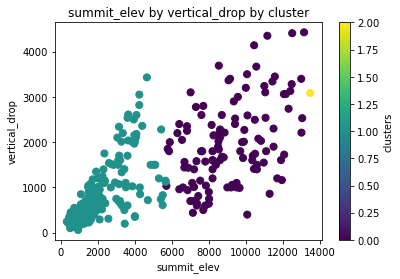

In [62]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
cbar =plt.colorbar()
cbar.set_label('clusters')
#plt.savefig('figures/fig1.png',bbox_inches='tight')

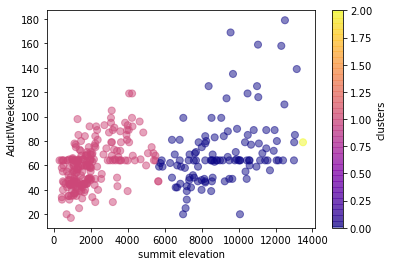

In [63]:
plt.scatter(df['summit_elev'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='plasma', label ='clusters',alpha=0.5)
plt.xlabel('summit elevation')
plt.ylabel('AdutlWeekend')
cbar =plt.colorbar()
cbar.set_label('clusters')
#plt.xscale('log')
#plt.yscale('log')

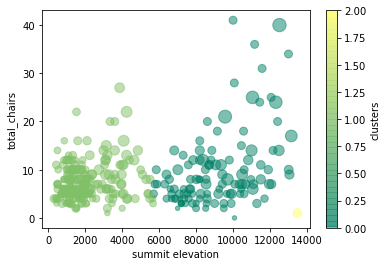

In [64]:
plt.scatter(df['summit_elev'], df['total_chairs'], c=df['clusters'], s=df['AdultWeekend'], cmap='summer',alpha=0.5)
plt.xlabel('summit elevation')
plt.ylabel('total_chairs')
cbar =plt.colorbar()
cbar.set_label('clusters')

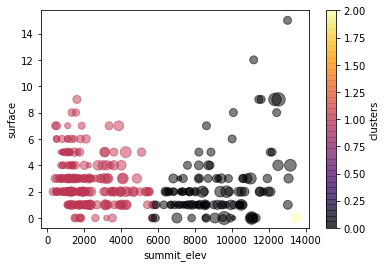

In [65]:
plt.scatter(df['summit_elev'], df['surface'], c=df['clusters'], s=df['AdultWeekend'], cmap='inferno',alpha=0.5)
plt.xlabel('summit_elev')
plt.ylabel('surface')
cbar =plt.colorbar()
cbar.set_label('clusters')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [66]:
os.getcwd()
os.chdir(r'C:\\Users\\Abhinov Baruah\\Documents\\DataWrangling_Step2\\Step 2\\')

In [67]:
os.listdir(os.getcwd())

['.DS_Store',
 '.ipynb_checkpoints',
 '1589505302_05152020_updated_ski_data_-_updated_ski_data.csv',
 'data',
 'figures',
 'models',
 'Notebook_steptwo.ipynb',
 'updated_ski_data (1).csv',
 'User']

In [68]:
import pickle
s = pickle.dumps(model1)
from joblib import dump, load
dump(model1, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [69]:
Model_Coefficients = pd.DataFrame(abs(model1.coef_),index=X.columns,columns=['Coefficient'])
print(Model_Coefficients)

                    Coefficient
summit_elev        1.710943e+00
vertical_drop      1.198044e+00
trams              3.401840e+11
fastEight          3.344342e+10
fastSixes          3.959183e+11
fastQuads          1.335529e+12
quad               7.972277e+11
triple             9.836695e+11
double             1.102684e+12
surface            1.251291e+12
total_chairs       3.522873e+12
Runs               1.189009e+00
TerrainParks       2.592211e-02
LongestRun_mi      3.835826e-01
SkiableTerrain_ac  5.085413e-01
Snow Making_ac     3.165163e-01
daysOpenLastYear   5.936870e-01
yearsOpen          3.714636e-01
averageSnowfall    1.356941e-01
AdultWeekday       1.929863e+01
projectedDaysOpen  1.593160e-01
NightSkiing_ac     8.109593e-01
clusters           9.900079e-01
Arizona            1.118555e-01
California         5.524906e-01
Colorado           4.113651e-02
Connecticut        8.599771e-01
Idaho              6.889156e-01
Illinois           4.013827e-01
Indiana            2.016624e-01
Iowa    

In [70]:
os.getcwd()

'C:\\Users\\Abhinov Baruah\\Documents\\DataWrangling_Step2\\Step 2'

In [71]:
os.listdir(os.getcwd())

['.DS_Store',
 '.ipynb_checkpoints',
 '1589505302_05152020_updated_ski_data_-_updated_ski_data.csv',
 'data',
 'figures',
 'models',
 'Notebook_steptwo.ipynb',
 'updated_ski_data (1).csv',
 'User']

In [72]:
os.chdir(r'C:\Users\Abhinov Baruah\Documents\DataWrangling_Step2\Step 2\data')

In [73]:
os.listdir(os.getcwd())

['Model_Coefficients.csv',
 'step2_output.csv',
 'Step3_EDA.csv',
 'Step3_output.csv',
 'SWEETVIZ_REPORT.html']

In [74]:
Model_Coefficients.to_csv('Model_Coefficients.csv',index=False)